Mounted at /content/drive


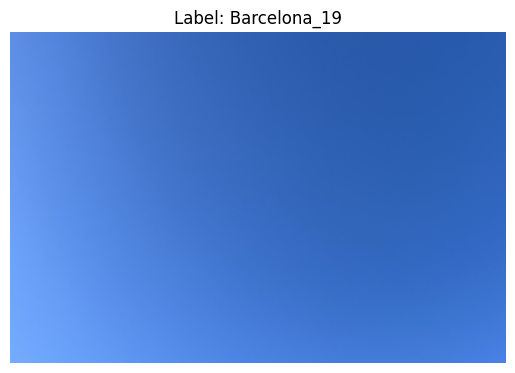

In [ ]:
import numpy as np
import pandas as pd
import cv2
import zipfile
import os
from sklearn import decomposition
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Extract images from zip file
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Image_project_pattern.zip', 'r')
zip_train.extractall('/tmp/Image_project_pattern')
zip_train.close()

# Change directory to extracted images
os.chdir('/tmp/Image_project_pattern')

#
# 'Tls_01.JPG', 'Tls_02.JPG', 'Tls_03.JPG','Tls_04.JPG','Tls_05.JPG',
# Define image file names and corresponding labels
image_fil = [
    'Bcn_01.jpg', 'Bcn_02.jpeg', 'Bcn_03.jpg', 'Bcn_04.jpg','Bcn_05.jpg', 'Bcn_06.jpg','Bcn_07.jpg', 'Bcn_08.jpg', 'Tls_01.JPG',
    'Tls_02.JPG', 'Tls_03.JPG','Tls_04.JPG','Tls_05.JPG', 'Tls_06.JPG', 'Tls_07.JPG', 'Tls_08.JPG', 'Tls_09.JPG', 'Tls_10.JPG',
    'Tls_11.JPG', 'Tls_12.jpg', 'Tls_13.jpg',    'Tls_14.jpg', 'Tls_15.jpg', 'Tls_16.jpg', 'Tls_17.jpg', 'Tls_18.jpg',
    'Tls_19.jpg', 'Tls_20.jpg', 'Tls_21.jpg', 'Tls_22.jpg', 'Tls_23.jpg','Tls_24.jpg', 'Tls_25.jpg', 'Tls_26.jpg',
]


image_files=[]
for im in image_fil:

  image = plt.imread(im)

  # Get the dimensions of the original image
  height, width, _ = image.shape

  # Define the desired reduction amount for each boundary
  top_reduce = 500
  bottom_reduce = 500
  left_reduce = 500
  right_reduce = 500

  # Calculate the new boundaries
  top_boundary = top_reduce
  bottom_boundary = height - bottom_reduce
  left_boundary = left_reduce
  right_boundary = width - right_reduce

  # Crop the image using the new boundaries
  cropped_image = image[top_boundary:bottom_boundary, left_boundary:right_boundary]
  image_files.append(cropped_image)



#'Barcelona_19', 'Barcelona_19','Barcelona_19', 'Barcelona_19','Barcelona_19', 'Barcelona_19',
#'Toulouse_15', 'Toulouse_15', 'Toulouse_15','Toulouse_15', 'Toulouse_15',
Labels = [
    'Barcelona_17', 'Barcelona_17', 'Barcelona_19', 'Barcelona_19','Barcelona_19', 'Barcelona_19','Barcelona_19', 'Barcelona_19',
    'Toulouse_17', 'Toulouse_17', 'Toulouse_17', 'Toulouse_17', 'Toulouse_17','Toulouse_19', 'Toulouse_19', 'Toulouse_19',
    'Toulouse_19', 'Toulouse_19', 'Toulouse_19', 'Toulouse_07', 'Toulouse_07',    'Toulouse_07', 'Toulouse_07', 'Toulouse_07',
    'Toulouse_07', 'Toulouse_07',    'Toulouse_07', 'Toulouse_11', 'Toulouse_11', 'Toulouse_11', 'Toulouse_11','Toulouse_11',
    'Toulouse_11', 'Toulouse_11'
]

X_train, X_test, y_train, y_test = train_test_split(image_files, Labels, test_size=5, random_state=42)
# Load images
#images = [plt.imread(image_file) for image_file in image_files]

import matplotlib.pyplot as plt

# Plot the 3rd cropped image
plt.imshow(image_files[2])  # Assuming Python indexing starts from 0
plt.title("Label: " + Labels[2])  # Assuming Python indexing starts from 0
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import random

def random_batch(image, batch_width, batchp_height, n_batches):
    """
    Crop random regions from the image with specified dimensions.

    Args:
    image (numpy.ndarray): The input image.
    crop_width (int): The width of the cropped region.
    crop_height (int): The height of the cropped region.
    n_batches (int): The number of random crops to generate.

    Returns:
    list of numpy.ndarray: List containing cropped images.
    """
    # Get the dimensions of the original image
    height, width, _ = image.shape

    # Initialize list to store cropped images
    cropped_images = []

    for _ in range(n_batches):
        # Calculate the maximum coordinates for the top-left corner of the crop region
        max_x = width - batch_width
        max_y = height - batch_height

        # Choose a random location for the top-left corner of the crop region
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)

        # Crop the image using the random location and specified dimensions
        cropped_image = image[y:y+batch_height, x:x+batch_width]

        # Append cropped image to the list
        cropped_images.append(cropped_image)

    return cropped_images

In [ ]:
# Define the dimensions for the batch and the amount of batches
batch_width = 200
batch_height = 200
n_batches=4

samples=[]

for image in image_files:
  batches=random_batch(image, batch_width, batch_height, n_batches)
  samples.append(batches)

<ipython-input-4-7a8f8dc23943>:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


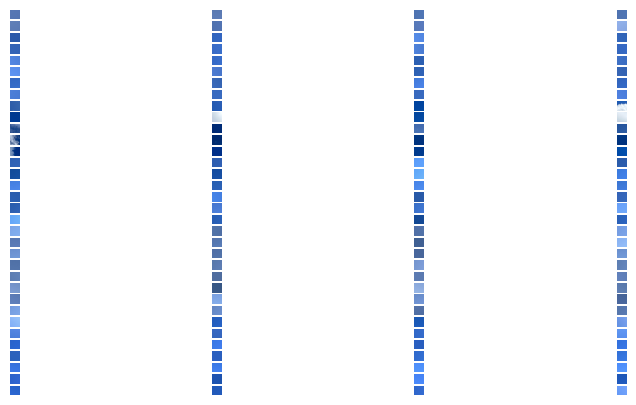

In [ ]:
#Let's plot the samples

def plot_batches(batches):
    num_images = len(batches)
    num_batches = len(batches[0])

    fig, axes = plt.subplots(num_images, num_batches, figsize=(10, 5))

    for i in range(num_images):
        for j in range(num_batches):
            axes[i, j].imshow(batches[i][j])
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot the batches
plot_batches(samples)

In [ ]:
#plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
blue_imgs_list = []
green_imgs_list = []
red_imgs_list = []

# Load and split channels for each image
for img_arr in samples:
    # Assuming img_arr is a list containing arrays representing images
    for img in img_arr:
        blue, green, red = cv2.split(img)
        blue_imgs_list.append(blue)
        green_imgs_list.append(green)
        red_imgs_list.append(red)

# Flatten channel images
flattened_blue_imgs = [img.flatten() for img in blue_imgs_list]
flattened_green_imgs = [img.flatten() for img in green_imgs_list]
flattened_red_imgs = [img.flatten() for img in red_imgs_list]

# Create data matrices
data_matrix_blue = np.array(flattened_blue_imgs)
data_matrix_green = np.array(flattened_green_imgs)
data_matrix_red = np.array(flattened_red_imgs)

In [ ]:
white_samples = []

for image_id in range(len(data_matrix_blue)):
    blue_mean = 0
    green_mean = 0
    red_mean = 0
    n = 0
    white_ids = []
    for pixel_id in range(len(data_matrix_blue[image_id])):
        # Collect all pixels which are clouds
        if data_matrix_blue[image_id][pixel_id] > 150 and data_matrix_green[image_id][pixel_id] > 150 and data_matrix_red[image_id][pixel_id] > 150:
            white_ids.append(pixel_id)
        # Compute the each colour mean of each patch
        else:
            blue_mean += data_matrix_blue[image_id][pixel_id]
            green_mean += data_matrix_green[image_id][pixel_id]
            red_mean += data_matrix_red[image_id][pixel_id]
            n += 1
    # Replace cloud pixels with the colour mean of the patch
    if n != 0:
        blue_mean /= n
        green_mean /= n
        red_mean /= n
        for id in white_ids:
            data_matrix_blue[image_id][id] = blue_mean
            data_matrix_green[image_id][id] = green_mean
            data_matrix_red[image_id][id] = red_mean
    else:
        white_samples.append(image_id)

# Remove full cloud images from all matrices
data_matrix_blue = np.delete(data_matrix_blue, white_samples, axis=0)
data_matrix_green = np.delete(data_matrix_green, white_samples, axis=0)
data_matrix_red = np.delete(data_matrix_red, white_samples, axis=0)

<ipython-input-4-19b712c09522>:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


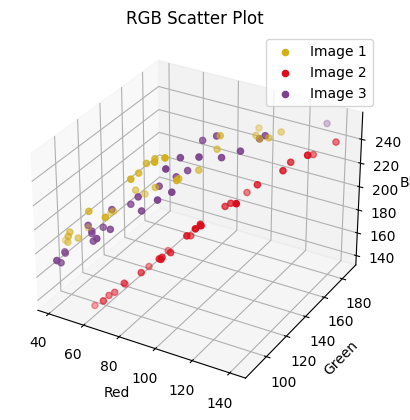

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

image_files = [
    'Tls_21.jpg',  'Tls_13.jpg','Bcn_03.jpg'
]
# Function to get 30 random pixels from an image
def get_random_pixels(image,label, num_pixels=30):
    width, height = image.size
    pixels = []
    for _ in range(num_pixels):
        x = np.random.randint(0, width)
        y = np.random.randint(0, height)
        pixel = image.getpixel((x, y))
        pixels.append((pixel, label))
    return pixels

# Function to plot RGB scatter plot
def plot_rgb_scatter(pixels, image_name):
    r = [pixel[0] for pixel in pixels]
    g = [pixel[1] for pixel in pixels]
    b = [pixel[2] for pixel in pixels]
    plt.figure()
    plt.scatter(r, g, c='r', label='Red', alpha=0.5)
    plt.scatter(r, b, c='b', label='Blue', alpha=0.5)
    plt.scatter(g, b, c='g', label='Green', alpha=0.5)
    plt.xlabel('Red')
    plt.ylabel('Green/Blue')
    plt.title('RGB Scatter Plot of ' + image_name)
    plt.legend()
    plt.show()

# Initialize arrays for each color channel
r_values = []
g_values = []
b_values = []
labels = []



# Iterate over each image file
for idx, image_file in enumerate(image_files):
    image = Image.open(image_file)

    # Get 30 random pixels
    random_pixels = get_random_pixels(image,idx)

    r_values.extend([pixel[0][0] for pixel in random_pixels])
    g_values.extend([pixel[0][1] for pixel in random_pixels])
    b_values.extend([pixel[0][2] for pixel in random_pixels])
    labels.extend([pixel[1] for pixel in random_pixels])

# Plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label_idx, label in enumerate(set(labels)):
    ax.scatter(
        [r_values[i] for i in range(len(labels)) if labels[i] == label],
        [g_values[i] for i in range(len(labels)) if labels[i] == label],
        [b_values[i] for i in range(len(labels)) if labels[i] == label],
        c=np.random.rand(3,),  # Random color for each label
        marker='o',
        label=f"Image {label + 1}"
    )
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('RGB Scatter Plot')
ax.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TEST for PCA in 2 dimensions

In [ ]:
# Perform PCA
pca = PCA(n_components=100)# Choose number of components

pca.fit(data_matrix_blue)

Xproj = pca.transform(data_matrix_blue)
dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])
ax = sns.scatterplot(x="PCA1", y="PCA2", hue=Labels,data=dfpca)
plt.show()


# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)



ValueError: n_components=100 must be between 0 and min(n_samples, n_features)=34 with svd_solver='full'

In [ ]:
# Perform PCA
pca = PCA(n_components=2)  # Choose number of components
pca.fit(data_matrix_green)



Xproj = pca.transform(data_matrix_green)
dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])
ax = sns.scatterplot(x="PCA1", y="PCA2", hue=Labels,data=dfpca)
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


In [ ]:
# Perform PCA
pca = PCA(n_components=2)  # Choose number of components
pca.fit(data_matrix_red)

Xproj = pca.transform(data_matrix_red)
dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])
ax = sns.scatterplot(x="PCA1", y="PCA2", hue=Labels,data=dfpca)
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

In [ ]:

# Perform PCA
pca = PCA(n_components=3)  # Choose number of components
pca.fit(data_matrix_blue)

Xproj = pca.transform(data_matrix_blue)
# Create a DataFrame with PCA components
dfpca = pd.DataFrame(Xproj[:,0:3], columns=['PCA1', 'PCA2', 'PCA3'])

# Plot the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Labels_color = pd.Series(Labels).replace({'Barcelona_17': 'green', 'Barcelona_19': 'red','Toulouse_19':'blue','Toulouse_07':'orange','Toulouse_11':'purple'})

# Use the c parameter with Labels array for coloring
scatter = ax.scatter(dfpca['PCA1'].values, dfpca['PCA2'].values, dfpca['PCA3'].values, c=Labels_color, cmap='viridis')

# Show the plot
plt.show()

In [ ]:
# Perform PCA
pca = PCA(n_components=3)  # Choose number of components
pca.fit(data_matrix_green)

Xproj = pca.transform(data_matrix_green)
# Create a DataFrame with PCA components
dfpca = pd.DataFrame(Xproj[:,0:3], columns=['PCA1', 'PCA2', 'PCA3'])

# Plot the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Labels_color = pd.Series(Labels).replace({'Barcelona_17': 'green', 'Barcelona_19': 'red','Toulouse_19':'blue','Toulouse_07':'orange','Toulouse_11':'purple'})

# Use the c parameter with Labels array for coloring
scatter = ax.scatter(dfpca['PCA1'].values, dfpca['PCA2'].values, dfpca['PCA3'].values, c=Labels_color, cmap='viridis')

# Show the plot
plt.show()

In [ ]:
# Perform PCA
pca = PCA(n_components=3)  # Choose number of components
pca.fit(data_matrix_red)

Xproj = pca.transform(data_matrix_red)
# Create a DataFrame with PCA components
dfpca = pd.DataFrame(Xproj[:,0:3], columns=['PCA1', 'PCA2', 'PCA3'])

# Plot the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Labels_color = pd.Series(Labels).replace({'Barcelona_17': 'green', 'Barcelona_19': 'red','Toulouse_19':'blue','Toulouse_07':'orange','Toulouse_11':'purple'})

# Use the c parameter with Labels array for coloring
scatter = ax.scatter(dfpca['PCA1'].values, dfpca['PCA2'].values, dfpca['PCA3'].values, c=Labels_color, cmap='viridis')

# Show the plot
plt.show()


In [ ]:
from sklearn import mixture
NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='tied').fit(Xproj)
    bic.append(gmm.bic(Xproj))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='tied').fit(Xproj)

fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(Xproj)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(dfpca['PCA1'].values, dfpca['PCA2'].values, dfpca['PCA3'].values, c=y_pred_gmm,cmap='viridis')
plt.title("GMM clustering")
plt.show()

#img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
#viewing the compressed image
#plt.imshow(img_compressed)